# Part II - Fordgobike_Data_Explanatory_Presentation

## Edidiong Godwin Umoh 


### Let's examine the duration of trips between stations and other features in the dataset that may affect it.

## Investigation Overview:

> The focus of this investigation is the duration of trips between stations in a Ford GoBike sharing event. The analysis will utilize a dataset containing information on bike trips between stations, including features such as member birth year, subscriber type, and longitude and latitude data. Additional columns, including distance between stations, speed, and member age, were generated to facilitate analysis.

## Dataset Overview:

> The dataset used for this investigation provides information on bike trips between stations in a bike sharing event. It includes features such as member birth year, subscriber type, longitude and latitude data, and other relevant trip details. To further facilitate the analysis, additional columns were generated, such as distance between stations, speed, and member age.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load in the dataset using pandas
df = pd.read_csv("201902-fordgobike-tripdata.csv")

In [3]:
# Dropping all Empty rows
df.dropna(inplace=True)

In [4]:
## to calculate the distance between the two geolocations
import haversine as hs
from haversine import Unit

In [5]:
def haversine(lat1, long1, lat2, long2):
    """
    This function takes in the two locations by their longitude and lattitude then
    uses the haversine module to calculate the distance between them
    """
    loc1 = (lat1, long1)
    loc2 = (lat2, long2)
    
    
    
    return hs.haversine(loc1, loc2, unit=Unit.MILES)

In [6]:
# Calculating the distance(in miles) between the various start and end points
df['distance_miles'] = df.apply( lambda x : haversine(x['start_station_latitude'], x['start_station_longitude'],  x['end_station_latitude'], x['end_station_longitude']), axis=1)

In [7]:
# Converting the duration of the trips in seconds to hours (1 hour = 3600s)
df['duration_hrs'] = df.apply(lambda x : x['duration_sec'] / 3600, axis=1)

#### Since we know the distance and the time for the trips, then we can calculate the speed of the Journey.

speed = Distance / Time

In [8]:
# Working out the speed
df['speed_mph'] = df['distance_miles'] / df['duration_hrs']

# Converting the start time and end times into datetime objects
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# Converting usertype, member_gender and bikeshare_for_all_trip into categorical data
df["user_type"] = df.user_type.astype('category')
df["member_gender"] = df.member_gender.astype('category')
df["bike_share_for_all_trip"] = df.bike_share_for_all_trip.astype('category')

# Getting member's age from their birth year
df["member_age"] = 2019 - df["member_birth_year"]

# Start time  day of week
df['day_of_ride'] = df['start_time'].dt.day_name()

# Hour of Ride
df["start_hour"] = df["start_time"].dt.hour

In [9]:
df.sample(6)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance_miles,duration_hrs,speed_mph,member_age,day_of_ride,start_hour
123621,729,2019-02-11 09:08:48.899,2019-02-11 09:20:58.300,92.0,Mission Bay Kids Park,37.772301,-122.393028,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Subscriber,1995.0,Male,No,1.168913,0.202500,5.772410,24.0,Monday,9
31555,434,2019-02-24 16:31:02.113,2019-02-24 16:38:16.755,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,50.0,2nd St at Townsend St,37.780526,...,Subscriber,1987.0,Male,No,0.651495,0.120556,5.404110,32.0,Sunday,16
37807,218,2019-02-23 13:24:34.773,2019-02-23 13:28:12.881,142.0,Guerrero Park,37.745739,-122.422140,134.0,Valencia St at 24th St,37.752428,...,Subscriber,1984.0,Male,No,0.469494,0.060556,7.753117,35.0,Saturday,13
162270,631,2019-02-05 12:06:58.127,2019-02-05 12:17:29.997,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,50.0,2nd St at Townsend St,37.780526,...,Subscriber,1993.0,Male,No,0.392369,0.175278,2.238557,26.0,Tuesday,12
29150,1288,2019-02-25 07:36:49.824,2019-02-25 07:58:18.114,146.0,30th St at San Jose Ave,37.742314,-122.423180,104.0,4th St at 16th St,37.767045,...,Subscriber,1979.0,Female,No,2.458093,0.357778,6.870446,40.0,Monday,7
32099,3681,2019-02-24 14:17:14.488,2019-02-24 15:18:36.026,377.0,Fell St at Stanyan St,37.771917,-122.453704,377.0,Fell St at Stanyan St,37.771917,...,Customer,1976.0,Male,No,0.000000,1.022500,0.000000,43.0,Sunday,14


### Distribution of rides by User Type

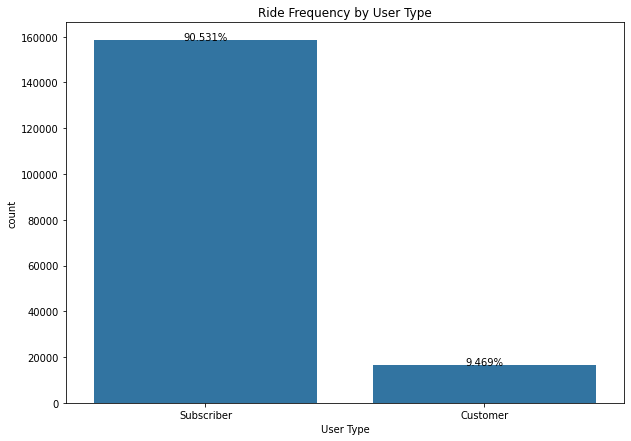

In [10]:
plt.figure(figsize = (10, 7))
ax = sns.countplot(data = df, x = 'user_type',  color=sns.color_palette()[0], order=df.user_type.value_counts().index)

total = len(df)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.xlabel('User Type')
plt.title('Ride Frequency by User Type');

#### Based on the figure above, it can be observed that subscribers make up 90% of the total bike rides.

### Distribution of Rides by Days

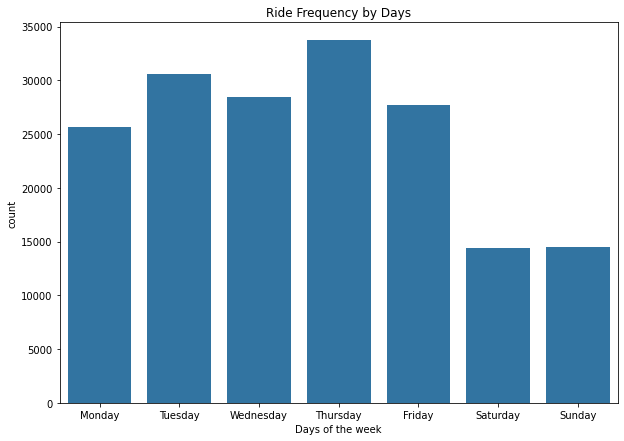

In [11]:
plt.figure(figsize = (10,7))
sns.countplot(data = df, x = 'day_of_ride', color = sns.color_palette()[0], order=['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'])
plt.xlabel('Days of the week')
plt.title('Ride Frequency by Days');

#### The majority of bike rides took place on Thursdays and Tuesdays, with the lowest number of trips occurring on weekends.

### Distribution of Rides by start hour

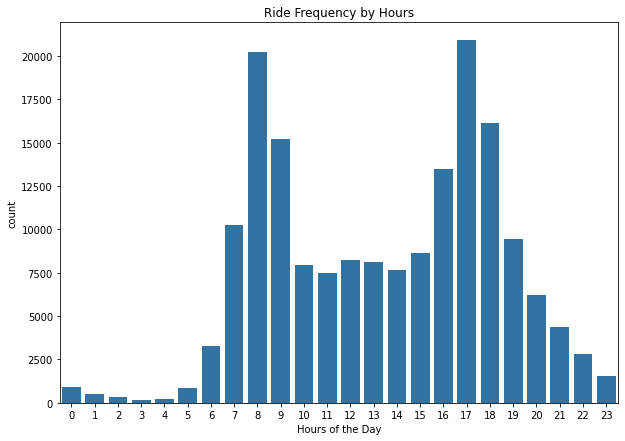

In [12]:
plt.figure(figsize = (10, 7))
sns.countplot(data = df, x = 'start_hour', color = sns.color_palette()[0])
plt.xlabel('Hours of the Day')
plt.title('Ride Frequency by Hours');

#### The higher frequency of bike rides during the morning (between 8 and 9 am) and evening (between 5 and 6 pm) may be associated with rush hour periods when people commute to and from work.

### Checking the distribution of the duration of the rides according to the day of ride

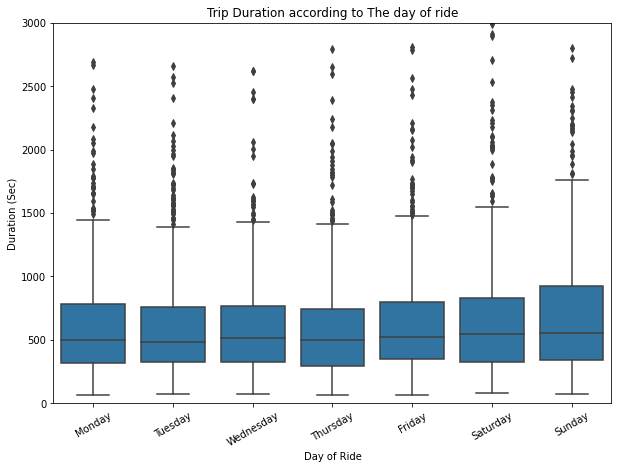

In [13]:
plt.figure(figsize=[10, 7])
vis_data = df.sample(5000)

default_color = sns.color_palette()[0]

g = sns.boxplot(data = vis_data, y= 'duration_sec', x =  'day_of_ride', color=default_color, order=['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'])

g.tick_params(axis="x", rotation=30)
plt.ylim([0,3000])
plt.xlabel('Day of Ride')
plt.ylabel('Duration (Sec)')
plt.title('Trip Duration according to The day of ride');

#### Thursdays and Tuesdays had the highest number of bike rides, while weekends had the lowest number of trip records.

### Checking the distribution of the duration of the rides according to user type

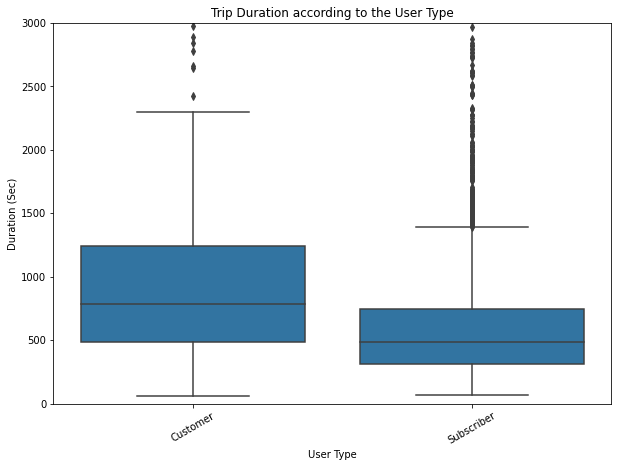

In [14]:
plt.figure(figsize=[10, 7])
vis_data = df.sample(5000)

default_color = sns.color_palette()[0]

g = sns.boxplot(data = vis_data, y= 'duration_sec', x =  'user_type', color=default_color)

g.tick_params(axis="x", rotation=30)
plt.ylim([0,3000])
plt.xlabel('User Type')
plt.ylabel('Duration (Sec)')
plt.title('Trip Duration according to the User Type');

#### In general, customers have longer trip durations compared to subscribers.

### Duration of Trips across user types and days of the week

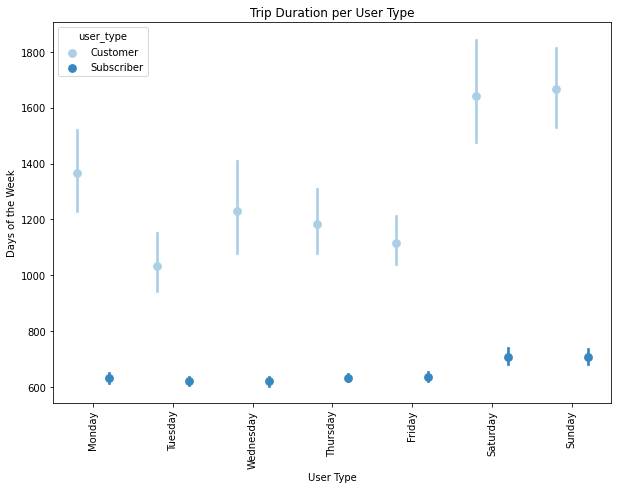

In [15]:
fig = plt.figure(figsize=[10, 7])
g = sns.pointplot(data = df, x ='day_of_ride', y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4, order=['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'])
plt.xlabel('User Type')
plt.ylabel('Days of the Week')
plt.title('Trip Duration per User Type')
g.tick_params(axis="x", rotation=90)
g.set_yticklabels([],minor = True);

#### On average, customers have longer trip durations than subscribers, with the longest durations occurring on weekends. Although subscribers tend to travel shorter distances overall, there is a slight increase in distance on weekends, but not as much as seen with customers.

### Generating Slideshow

In [16]:
!jupyter nbconvert Edidiong_Explanatory_Analysis.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Edidiong_Explanatory_Analysis.ipynb to slides
[NbConvertApp] Writing 409179 bytes to Edidiong_Explanatory_Analysis.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "c:\users\emmyvera\appdata\local\programs\python\python37\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\emmyvera\appdata\local\programs\python\python37\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Emmyvera\AppData\Local\Programs\Python\Python37\Scripts\jupyter-nbconvert.EXE\__main__.py", line 9, in <module>
  File "c:\users\emmyvera\appdata\local\programs\python\python37\lib\site-packages\jupyter_core\application.py", line 266, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "c:\users\emmyvera\appdata\local\programs\python\python37\lib\site-packages\trait